In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [88]:
data = pd.read_excel('review-details.xlsx')
data


report_date online_store            upc retailer_product_code  \
0     2019-01-02  FRESHAMAZON  8718114216478            B0142CI6FC   
1     2019-01-03  FRESHAMAZON  5000184201199            B014DFNNRY   
2     2019-01-03  FRESHAMAZON  5000184201199            B014DFNNRY   
3     2019-01-03  FRESHAMAZON  8712566479726            B014DFKELC   
4     2019-01-03  FRESHAMAZON  8717163536476            B014G37I7E   
...          ...          ...            ...                   ...   
2496  2019-05-27        OCADO  8714100873885             399390011   
2497  2019-05-27        OCADO       50184439              11120011   
2498  2019-05-27        OCADO  8722700479451              13958011   
2499  2019-05-27        OCADO  8714100873885             399390011   
2500  2019-05-27        OCADO  8714100873885             399390011   

              brand       category sub_category  \
0     Dove Men+Care  Personal Care         Deos   
1           Marmite          Foods      Savoury   
2           Marmite          Foods      Savoury   
3             Knorr          Foods      Savoury   
4               Cif       Homecare          HHC   
...             ...            ...          ...   
2496       Cornetto          Foods    Ice Cream   
2497         Bovril          Foods      Savoury   
2498     Hellmann's          Foods    Dressings   
2499       Cornetto          Foods    Ice Cream   
2500       Cornetto          Foods    Ice Cream   

                                    product_description review_date  \
0     Dove Men+Care Extra Fresh Anti-perspirant Deod...  2019-01-01   
1                    Marmite  Spread Yeast Extract 500g  2019-01-02   
2                    Marmite  Spread Yeast Extract 500g  2019-01-02   
3                         Knorr  Beef Stock Pot 8 x 28g  2019-01-02   
4                      Cif Citrus Bathroom Mousse 500ml  2019-01-02   
...                                                 ...         ...   
2496  Cornetto Made with Soy and Gluten Free Ice Cre...  2019-04-27   
2497                Bovril  Extract Beef and Yeast 250g  2019-05-02   
2498          Hellmann's Light Squeezy Mayonnaise 430ml  2019-05-05   
2499  Cornetto Made with Soy and Gluten Free Ice Cre...  2019-05-17   
2500  Cornetto Made with Soy and Gluten Free Ice Cre...  2019-04-27   

      review_rating  ...                                         dimension2  \
0                 5  ...                     Male Anti-Perspirant Deodorant   
1                 5  ...                                 COTC Yeast Extract   
2                 4  ...                                 COTC Yeast Extract   
3                 5  ...  Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated   
4                 5  ...                                    Bathroom Mousse   
...             ...  ...                                                ...   
2496              5  ...                               Dairy Free Ice Cream   
2497              5  ...  Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated   
2498              1  ...                                      #3 Light Mayo   
2499              4  ...                               Dairy Free Ice Cream   
2500              5  ...                               Dairy Free Ice Cream   

                                             dimension3  dimension4  \
0                   COTC Male Anti-Perspirant Deodorant         NaN   
1                                    COTC Yeast Extract         NaN   
2                                    COTC Yeast Extract         NaN   
3                                            Stock Pots         NaN   
4                                       Bathroom Mousse         NaN   
...                                                 ...         ...   
2496                               Dairy Free Ice Cream         NaN   
2497  Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated         NaN   
2498                                   Light Mayonnaise         NaN   
2499                               Dair

In [89]:
review_text = data.review_text

In [84]:
data = [review_text.strip() for review_text in data.review_text] # remove both the leading and the trailing characters removing space beside the text
data = [review_text for review_text in data if review_text] # removes empty strings, because they are considered in Python as False
data

['As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!',
 'Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.',
 'Excellent',
 'A great flavour top - up for slow cooking.',
 'Does what is says it does',
 'Excellent',
 'Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.',
 'A great flavour top - up for slow cooking.',
 'Excellent item.Good for men',
 'Thank you I’m very happy',
 'Thank you I’m very happy',
 'Beautiful',
 'Always buy. Big bottles',
 'Does what is says it does',
 'Always use this product on my heavily mistreated hair and it works wonders time after time',
 'Great value',
 'Always

In [49]:
# Joining the list into one string/text
reviews_text = ' '.join(data)
reviews_text

'As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits! Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it. Excellent A great flavour top - up for slow cooking. Does what is says it does Excellent Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it. A great flavour top - up for slow cooking. Excellent item.Good for men Thank you I’m very happy Thank you I’m very happy Beautiful Always buy. Big bottles Does what is says it does Always use this product on my heavily mistreated hair and it works wonders time after time Great value Always use this product on my heavily mistreated hair and it works wond

In [50]:
#Punctuation
no_punc_text = reviews_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'As you get older you know what you like and what is suitable for your body I like all Dove products Gives you that fresh all over wide awake feeling and no dandruff or flakey skin No smelly apits Three gigantic marmite jars that will last probably a whole life What else would you possibly wish for Order came in time when mentioned safely packed Very happy with it Excellent A great flavour top  up for slow cooking Does what is says it does Excellent Three gigantic marmite jars that will last probably a whole life What else would you possibly wish for Order came in time when mentioned safely packed Very happy with it A great flavour top  up for slow cooking Excellent itemGood for men Thank you I’m very happy Thank you I’m very happy Beautiful Always buy Big bottles Does what is says it does Always use this product on my heavily mistreated hair and it works wonders time after time Great value Always use this product on my heavily mistreated hair and it works wonders time after time It’s 

In [51]:
#Tokenization
from nltk.tokenize import word_tokenize
review_tokens = word_tokenize(no_punc_text)
print(review_tokens)

['As', 'you', 'get', 'older', 'you', 'know', 'what', 'you', 'like', 'and', 'what', 'is', 'suitable', 'for', 'your', 'body', 'I', 'like', 'all', 'Dove', 'products', 'Gives', 'you', 'that', 'fresh', 'all', 'over', 'wide', 'awake', 'feeling', 'and', 'no', 'dandruff', 'or', 'flakey', 'skin', 'No', 'smelly', 'apits', 'Three', 'gigantic', 'marmite', 'jars', 'that', 'will', 'last', 'probably', 'a', 'whole', 'life', 'What', 'else', 'would', 'you', 'possibly', 'wish', 'for', 'Order', 'came', 'in', 'time', 'when', 'mentioned', 'safely', 'packed', 'Very', 'happy', 'with', 'it', 'Excellent', 'A', 'great', 'flavour', 'top', 'up', 'for', 'slow', 'cooking', 'Does', 'what', 'is', 'says', 'it', 'does', 'Excellent', 'Three', 'gigantic', 'marmite', 'jars', 'that', 'will', 'last', 'probably', 'a', 'whole', 'life', 'What', 'else', 'would', 'you', 'possibly', 'wish', 'for', 'Order', 'came', 'in', 'time', 'when', 'mentioned', 'safely', 'packed', 'Very', 'happy', 'with', 'it', 'A', 'great', 'flavour', 'top', 

In [52]:
len(review_tokens)

76308

In [54]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in review_tokens if not word in my_stop_words]
print(no_stop_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['As', 'get', 'older', 'know', 'like', 'suitable', 'body', 'I', 'like', 'Dove', 'products', 'Gives', 'fresh', 'wide', 'awake', 'feeling', 'dandruff', 'flakey', 'skin', 'No', 'smelly', 'apits', 'Three', 'gigantic', 'marmite', 'jars', 'last', 'probably', 'whole', 'life', 'What', 'else', 'would', 'possibly', 'wish', 'Order', 'came', 'time', 'mentioned', 'safely', 'packed', 'Very', 'happy', 'Excellent', 'A', 'great', 'flavour', 'top', 'slow', 'cooking', 'Does', 'says', 'Excellent', 'Three', 'gigantic', 'marmite', 'jars', 'last', 'probably', 'whole', 'life', 'What', 'else', 'would', 'possibly', 'wish', 'Order', 'came', 'time', 'mentioned', 'safely', 'packed', 'Very', 'happy', 'A', 'great', 'flavour', 'top', 'slow', 'cooking', 'Excellent', 'itemGood', 'men', 'Thank', 'I', '’', 'happy', 'Thank', 'I', '’', 'happy', 'Beautiful', 'Always', 'buy', 'Big', 'bottles', 'Does', 'says', 'Always', 'use', 'product', 'heavily', 'mistreated', 'hair', 'works', 'wonders', 'time', 'time', 'Great', 'value', 'A

In [55]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['as', 'get', 'older', 'know', 'like', 'suitable', 'body', 'i', 'like', 'dove', 'products', 'gives', 'fresh', 'wide', 'awake', 'feeling', 'dandruff', 'flakey', 'skin', 'no', 'smelly', 'apits', 'three', 'gigantic', 'marmite', 'jars', 'last', 'probably', 'whole', 'life', 'what', 'else', 'would', 'possibly', 'wish', 'order', 'came', 'time', 'mentioned', 'safely', 'packed', 'very', 'happy', 'excellent', 'a', 'great', 'flavour', 'top', 'slow', 'cooking', 'does', 'says', 'excellent', 'three', 'gigantic', 'marmite', 'jars', 'last', 'probably', 'whole', 'life', 'what', 'else', 'would', 'possibly', 'wish', 'order', 'came', 'time', 'mentioned', 'safely', 'packed', 'very', 'happy', 'a', 'great', 'flavour', 'top', 'slow', 'cooking', 'excellent', 'itemgood', 'men', 'thank', 'i', '’', 'happy', 'thank', 'i', '’', 'happy', 'beautiful', 'always', 'buy', 'big', 'bottles', 'does', 'says', 'always', 'use', 'product', 'heavily', 'mistreated', 'hair', 'works', 'wonders', 'time', 'time', 'great', 'value', 'a

In [56]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['as', 'get', 'older', 'know', 'like', 'suitabl', 'bodi', 'i', 'like', 'dove', 'product', 'give', 'fresh', 'wide', 'awak', 'feel', 'dandruff', 'flakey', 'skin', 'no', 'smelli', 'apit', 'three', 'gigant', 'marmit', 'jar', 'last', 'probabl', 'whole', 'life', 'what', 'els', 'would', 'possibl', 'wish', 'order', 'came', 'time', 'mention', 'safe', 'pack', 'veri', 'happi', 'excel', 'a', 'great', 'flavour', 'top', 'slow', 'cook', 'doe', 'say', 'excel', 'three', 'gigant', 'marmit', 'jar', 'last', 'probabl', 'whole', 'life', 'what', 'els', 'would', 'possibl', 'wish', 'order', 'came', 'time', 'mention', 'safe', 'pack', 'veri', 'happi', 'a', 'great', 'flavour', 'top', 'slow', 'cook', 'excel', 'itemgood', 'men', 'thank', 'i', '’', 'happi', 'thank', 'i', '’', 'happi', 'beauti', 'alway', 'buy', 'big', 'bottl', 'doe', 'say', 'alway', 'use', 'product', 'heavili', 'mistreat', 'hair', 'work', 'wonder', 'time', 'time', 'great', 'valu', 'alway', 'use', 'product', 'heavili', 'mistreat', 'hair', 'work', 'won

In [58]:
# lemmas being one of them, but mostly POS, which will follow later
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp(' '.join(no_stop_tokens))
print(doc)

As get older know like suitable body I like Dove products Gives fresh wide awake feeling dandruff flakey skin No smelly apits Three gigantic marmite jars last probably whole life What else would possibly wish Order came time mentioned safely packed Very happy Excellent A great flavour top slow cooking Does says Excellent Three gigantic marmite jars last probably whole life What else would possibly wish Order came time mentioned safely packed Very happy A great flavour top slow cooking Excellent itemGood men Thank I ’ happy Thank I ’ happy Beautiful Always buy Big bottles Does says Always use product heavily mistreated hair works wonders time time Great value Always use product heavily mistreated hair works wonders time time It ’ one picture gets 5 stars ’ regular one I use ’ awesome people dry skin Item described excellent quality rapid delivery Great skin irritations redness blemishes Good body wash strong smell Great Great Worth I remember trying friends house years ago Now Ive using

In [59]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['as', 'get', 'old', 'know', 'like', 'suitable', 'body', 'I', 'like', 'Dove', 'product', 'give', 'fresh', 'wide', 'awake', 'feeling', 'dandruff', 'flakey', 'skin', 'no', 'smelly', 'apit', 'three', 'gigantic', 'marmite', 'jar', 'last', 'probably', 'whole', 'life', 'what', 'else', 'would', 'possibly', 'wish', 'order', 'come', 'time', 'mention', 'safely', 'pack', 'very', 'happy', 'Excellent', 'a', 'great', 'flavour', 'top', 'slow', 'cooking', 'do', 'say', 'Excellent', 'three', 'gigantic', 'marmite', 'jar', 'last', 'probably', 'whole', 'life', 'what', 'else', 'would', 'possibly', 'wish', 'order', 'come', 'time', 'mention', 'safely', 'pack', 'very', 'happy', 'a', 'great', 'flavour', 'top', 'slow', 'cooking', 'excellent', 'itemgood', 'man', 'thank', 'I', "'", 'happy', 'thank', 'I', "'", 'happy', 'Beautiful', 'always', 'buy', 'big', 'bottle', 'do', 'say', 'always', 'use', 'product', 'heavily', 'mistreat', 'hair', 'work', 'wonder', 'time', 'time', 'great', 'value', 'always', 'use', 'product', 

In [60]:
final_reviews=' '.join(lemmas)
final_reviews

'as get old know like suitable body I like Dove product give fresh wide awake feeling dandruff flakey skin no smelly apit three gigantic marmite jar last probably whole life what else would possibly wish order come time mention safely pack very happy Excellent a great flavour top slow cooking do say Excellent three gigantic marmite jar last probably whole life what else would possibly wish order come time mention safely pack very happy a great flavour top slow cooking excellent itemgood man thank I \' happy thank I \' happy Beautiful always buy big bottle do say always use product heavily mistreat hair work wonder time time great value always use product heavily mistreat hair work wonder time time it \' one picture get 5 star \' regular one I use \' awesome people dry skin Item describe excellent quality rapid delivery great skin irritation redness blemish good body wash strong smell Great Great Worth I remember try friend house year ago now I ve use 3months one Ill buy great not good 

In [62]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [63]:
print(vectorizer.vocabulary_)

{'as': 236, 'get': 1226, 'old': 1969, 'know': 1568, 'like': 1622, 'suitable': 2769, 'body': 377, 'dove': 887, 'product': 2189, 'give': 1235, 'fresh': 1171, 'wide': 3153, 'awake': 258, 'feeling': 1086, 'dandruff': 739, 'flakey': 1115, 'skin': 2537, 'no': 1908, 'smelly': 2576, 'apit': 207, 'three': 2895, 'gigantic': 1230, 'marmite': 1729, 'jar': 1539, 'last': 1577, 'probably': 2183, 'whole': 3151, 'life': 1617, 'what': 3131, 'else': 957, 'would': 3193, 'possibly': 2143, 'wish': 3171, 'order': 1989, 'come': 597, 'time': 2910, 'mention': 1762, 'safely': 2392, 'pack': 2017, 'very': 3069, 'happy': 1326, 'excellent': 1009, 'great': 1283, 'flavour': 1121, 'top': 2944, 'slow': 2561, 'cooking': 669, 'do': 863, 'say': 2415, 'itemgood': 1523, 'man': 1714, 'thank': 2858, 'beautiful': 311, 'always': 171, 'buy': 447, 'big': 340, 'bottle': 391, 'use': 3038, 'heavily': 1356, 'mistreat': 1793, 'hair': 1307, 'work': 3187, 'wonder': 3180, 'value': 3047, 'it': 1515, 'one': 1971, 'picture': 2098, 'star': 26

In [64]:
print(vectorizer.get_feature_names())
print(X.toarray())

C:\Users\Vicky\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0730', '10', '100', '1010', '1010i', '1012', '11', '114', '12', '13', '14', '140', '15', '150', '15ml', '15p', '16', '166', '18', '19', '195', '19lt', '1x38', '20', '2018', '201csmart', '203', '216', '228', '23', '24', '247', '25', '25u00b0c', '26', '273', '299', '2bromo2nitropropane13diol', '2nd', '2wiped', '2x25', '30', '300', '30c', '32', '34', '35', '36', '38', '3months', '3rd', '3yo', '40', '400', '400ml', '45', '48', '4x400ml', '50', '500', '50ml', '50p', '540', '540ml', '55', '55washes', '5l', '5litre', '5lt', '60', '60deg', '64', '67', '70', '75p', '850', '8hrs', '90', '900', 'aaaaaaaaamaze', 'aaaaamazing', 'able', 'about', 'above', 'abrasion', 'absence', 'absolute', 'absolutelly', 'absolutely', 'absorb', 'absorbs', 'absoulutely', 'accept', 'access', 'accidentally', 'accurate', 'accurately', 'accustom', 'acne', 'across', 'act', 'action', 'actual', 'actually', 'ad', 'add', 'addict', 'addition', 'additional', 'additive', 'address', 'adequate', 'admirably', 'admit', 'adore', 'ad

In [65]:
print(X.toarray().shape)


(45733, 3230)


In [66]:
#CountVectorizer( Bigrams & Trigrams)
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'always', 'amazing', 'be', 'bit', 'body', 'bottle', 'brand', 'buy', 'cheap', 'clean', 'clothe', 'collect', 'come', 'conditioner', 'cream', 'day', 'definitely', 'do', 'dry', 'easy', 'even', 'every', 'face', 'feel', 'find', 'fragrance', 'fresh', 'gel', 'gentle', 'get', 'give', 'go', 'good', 'great', 'hair', 'happy', 'however', 'it', 'its', 'job', 'keep', 'last', 'leave', 'like', 'little', 'long', 'look', 'lot', 'love', 'lovely', 'make', 'makeup', 'money', 'much', 'my', 'need', 'nice', 'not', 'one', 'part', 'price', 'product', 'promotion', 'purchase', 'quite', 'really', 'recommend', 'remove', 'review', 'say', 'scent', 'sensitive', 'shower', 'simple', 'skin', 'small', 'smell', 'smooth', 'soft', 'take', 'the', 'they', 'think', 'this', 'time', 'try', 'use', 'value', 've', 'very', 'wash', 'washing', 'week', 'well', 'wipe', 'without', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer



In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['100', 'absolutely', 'absorb', 'actually', 'add', 'affordable', 'age', 'ago', 'all', 'aloe', 'also', 'although', 'always', 'amazing', 'amazon', 'amount', 'and', 'another', 'anyone', 'anything', 'apply', 'area', 'around', 'arrive', 'as', 'ask', 'away', 'awful', 'baby', 'back', 'bad', 'bag', 'bargain', 'be', 'beautiful', 'become', 'big', 'bio', 'bit', 'body', 'bonus', 'bottle', 'box', 'brand', 'break', 'brilliant', 'bulk', 'but', 'buy', 'buying', 'can', 'cap', 'capsule', 'care', 'carry', 'cause', 'change', 'cheap', 'chemical', 'child', 'chocolate', 'clean', 'cleanse', 'cleanser', 'cleansing', 'clear', 'clothe', 'clothing', 'collect', 'colour', 'combination', 'come', 'comfort', 'compare', 'concentrate', 'concentrated', 'conditioner', 'consistency', 'contain', 'container', 'continue', 'convenient', 'cool', 'cost', 'could', 'couple', 'cream', 'creamy', 'cucumber', 'daily', 'damage', 'daughter', 'day', 'deal', 'decent', 'deep', 'definitely', 'delicious', 'deliver', 'delivery', 'deodorant', 

# Generate wordcloud


In [69]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

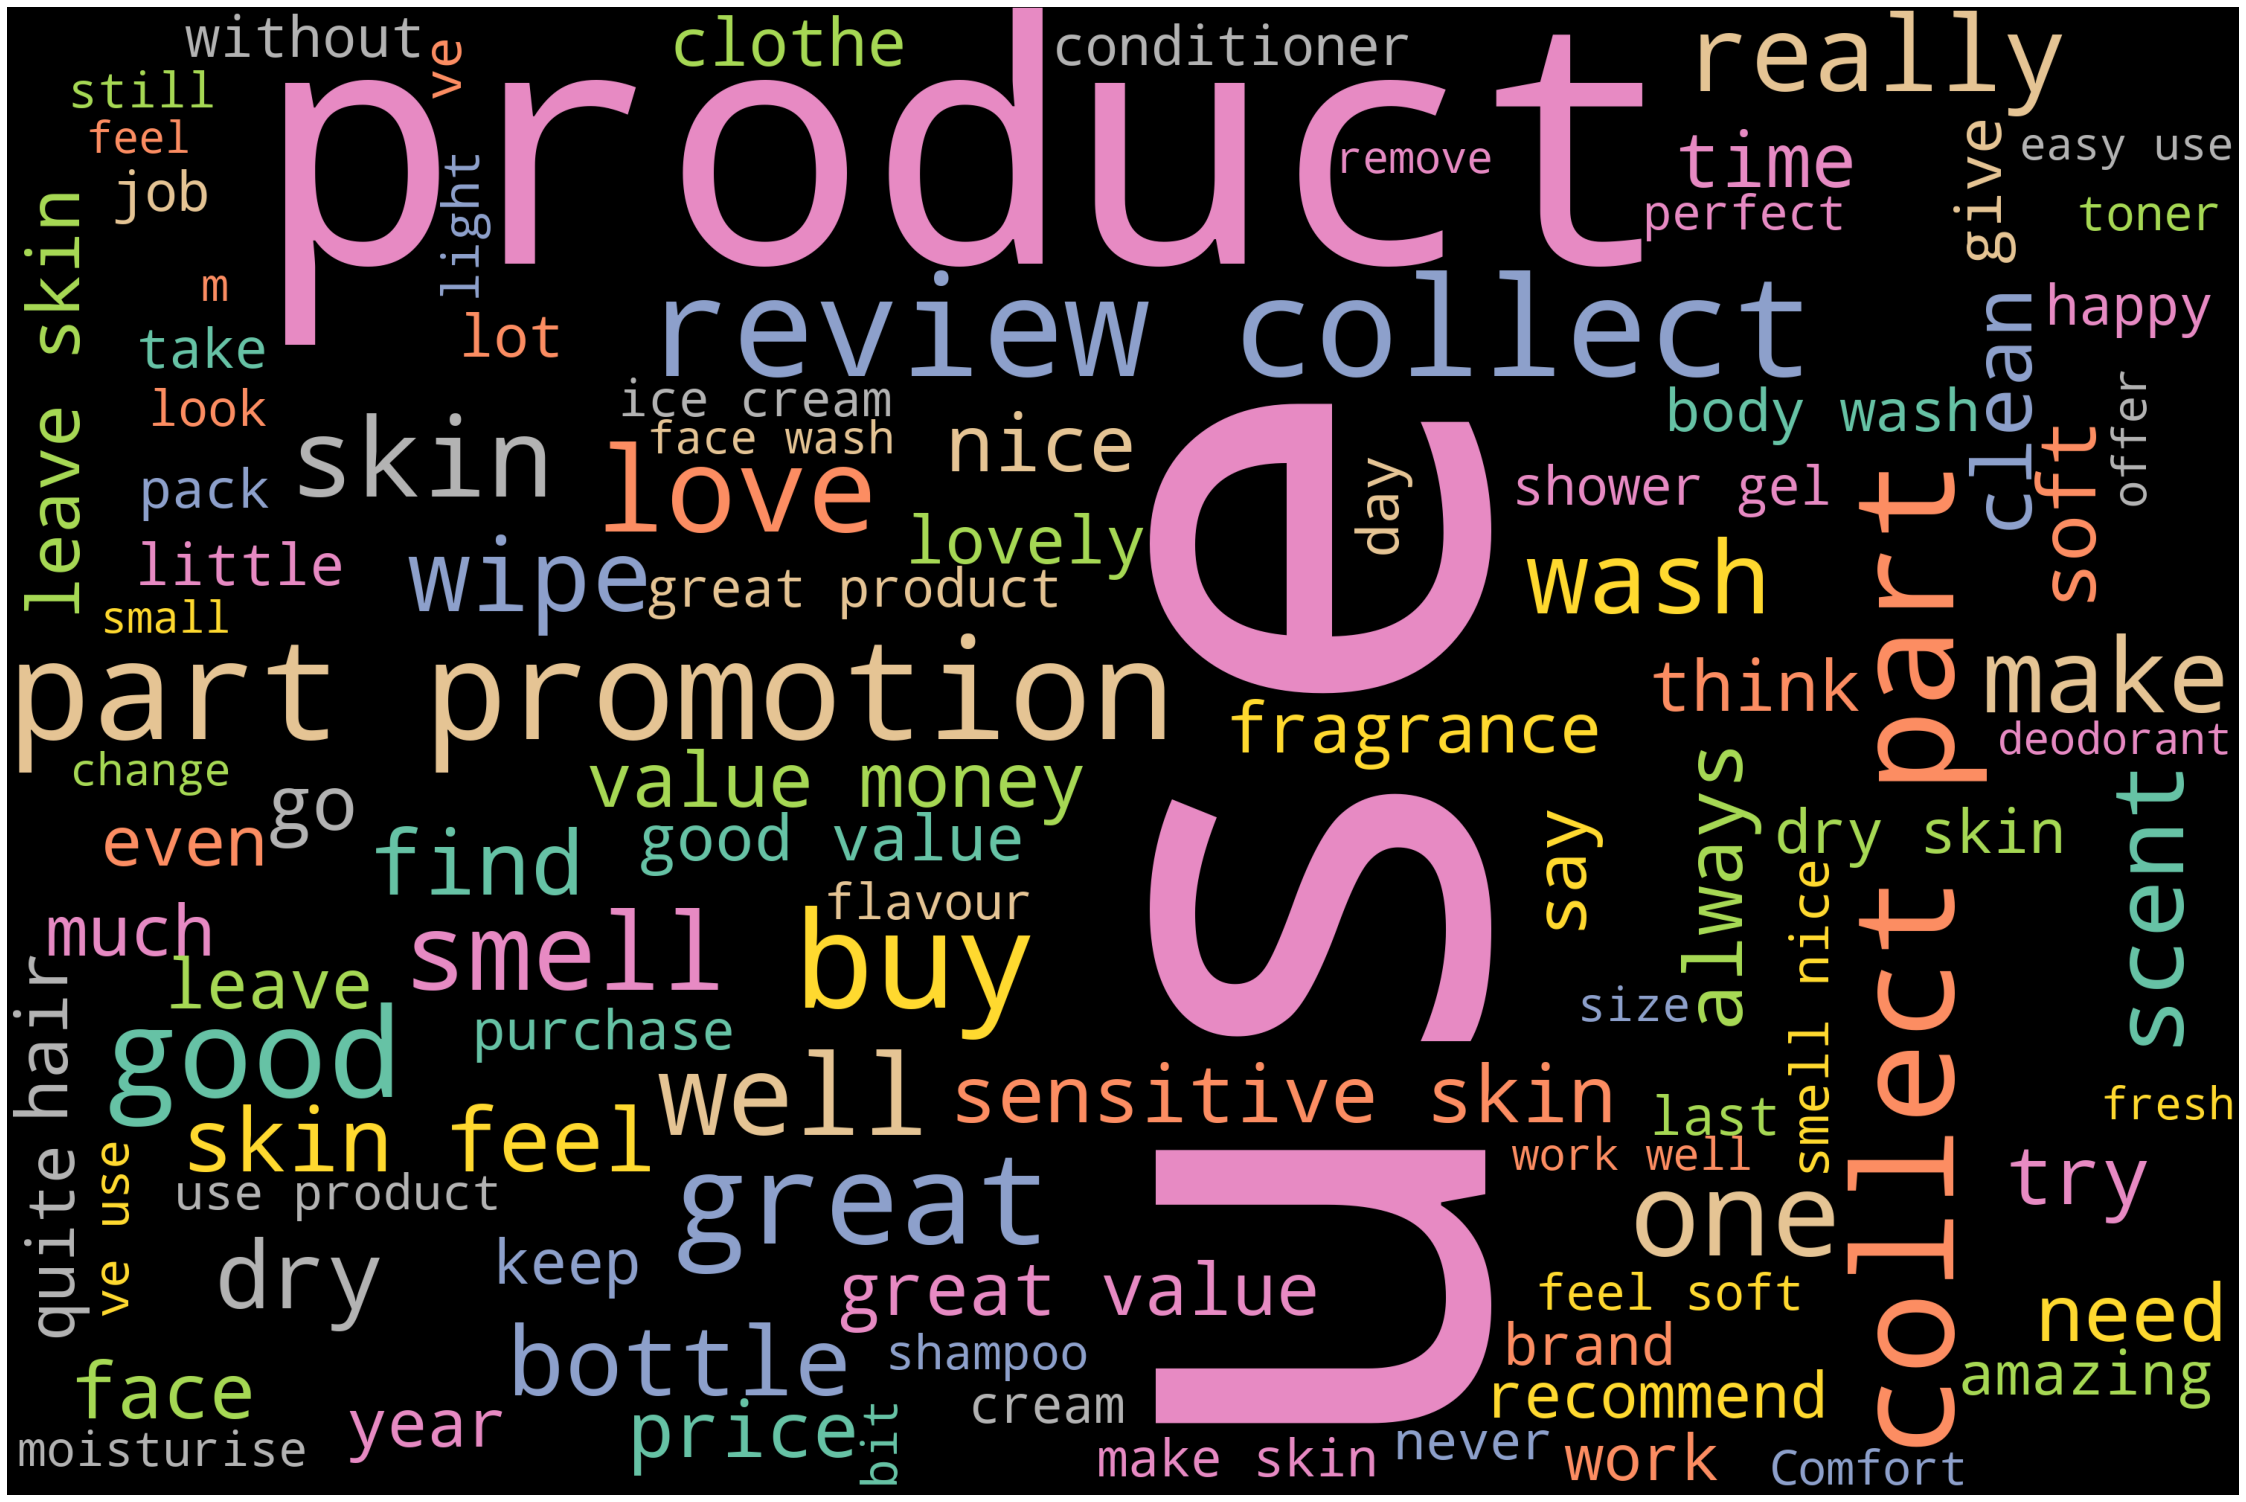

In [70]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(final_reviews)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [71]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
one_block = final_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [72]:
all_ents=[]
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents)    

{'CARDINAL',
 'DATE',
 'FAC',
 'GPE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [73]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>", token.pos_)

as ==> SCONJ
get ==> VERB
old ==> ADJ
know ==> NOUN
like ==> INTJ
suitable ==> ADJ
body ==> NOUN
I ==> PRON
like ==> VERB
Dove ==> PROPN
product ==> NOUN
give ==> VERB
fresh ==> ADJ
wide ==> ADJ
awake ==> ADJ
feeling ==> NOUN
dandruff ==> NOUN
flakey ==> NOUN
skin ==> NOUN
no ==> DET
smelly ==> ADJ
apit ==> NOUN
three ==> NUM
gigantic ==> ADJ
marmite ==> NOUN
jar ==> NOUN
last ==> ADJ
probably ==> ADV
whole ==> ADJ
life ==> NOUN
what ==> PRON
else ==> ADV
would ==> AUX
possibly ==> ADV
wish ==> VERB
order ==> NOUN
come ==> VERB
time ==> NOUN
mention ==> AUX
safely ==> ADV
pack ==> VERB
very ==> ADV
happy ==> ADJ
Excellent ==> PROPN
a ==> DET
great ==> ADJ
flavour ==> NOUN
top ==> ADJ
slow ==> ADJ
cooking ==> NOUN
do ==> AUX
say ==> VERB
Excellent ==> PROPN
three ==> NUM
gigantic ==> ADJ
marmite ==> NOUN
jar ==> NOUN
last ==> ADJ
probably ==> ADV
whole ==> ADJ
life ==> NOUN
what ==> PRON
else ==> ADV
would ==> AUX
possibly ==> ADV
wish ==> VERB
order ==> NOUN
come ==> VERB
time ==> NOUN

In [74]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['get', 'know', 'body', 'like', 'product', 'give', 'feeling', 'dandruff', 'flakey', 'skin', 'apit', 'marmite', 'jar', 'life', 'wish', 'order', 'come', 'time', 'pack', 'flavour', 'cooking', 'say', 'marmite', 'jar', 'life', 'wish', 'order', 'come', 'time', 'pack', 'flavour', 'cooking', 'man', 'thank', "'", 'thank', "'", 'buy', 'bottle', 'use', 'product', 'hair', 'work', 'wonder', 'time', 'time', 'value', 'use', 'product', 'hair', 'work', 'wonder', 'time', 'time', 'picture', 'get', 'star', 'one', 'use', 'people', 'dry', 'skin', 'describe', 'quality', 'delivery', 'skin', 'irritation', 'redness', 'body', 'wash', 'smell', 'remember', 'try', 'year', 'use', 'buy', 'antiperspirant', 'go', 'work', 'snow', 'drift', 'arm', 'love', 'product', 'die', 'eat', 'iu2019ll', 'die', 'man', 'love', 'love', 'range', 'body', 'lotion', 't', 'greasy', 'apply', 'soak', 'leave', 'skin', 'feel', 'moisturise', 'value', 'money', 'scent', 'light', 'go', 'beauty', 'bathroom', 'cupboard', 'review', 'collect', 'part', '

# Emotion Mining


In [76]:
#Sentiment analysis
afinn = pd.read_csv('https://raw.githubusercontent.com/rudeboybert/fivethirtyeight/master/inst/extdata/afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [77]:
afinn.sample(10)

word  value
783       dreading     -2
129        annoyed     -2
1709        pileup     -1
2314     unethical     -2
417       clueless     -2
30    accidentally     -2
415         clever      2
536        crushed     -2
460        condemn     -2
1170      heavenly      4

In [90]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(review_text))
sentences

['As you get older, you know what you like and what is suitable for your body.',
 'I like all Dove products.',
 'Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin.',
 'No smelly a/pits!',
 'Three gigantic marmite jars that will last probably a whole life!',
 'What else would you possibly wish for?',
 'Order came in time, when mentioned, safely packed.',
 'Very happy with it.',
 'Excellent A great flavour top - up for slow cooking.',
 'Does what is says it does Excellent Three gigantic marmite jars that will last probably a whole life!',
 'What else would you possibly wish for?',
 'Order came in time, when mentioned, safely packed.',
 'Very happy with it.',
 'A great flavour top - up for slow cooking.',
 'Excellent item.Good for men Thank you I’m very happy Thank you I’m very happy Beautiful Always buy.',
 'Big bottles Does what is says it does Always use this product on my heavily mistreated hair and it works wonders time after time Great value Always use

In [91]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

sentence
0     As you get older, you know what you like and w...
1                             I like all Dove products.
2     Gives you that fresh all over, wide awake feel...
3                                     No smelly a/pits!
4     Three gigantic marmite jars that will last pro...
...                                                 ...
4932     My 2 year old loves it and always asks for it.
4933                 Contents of this bottle is lovely.
4934  HOWEVER trying to get it out of the squeezy bo...
4935  I will buy Helmann's light mayo again but NEVE...
4936  These taste great and you cannot Cant tell the...

[4937 rows x 1 columns]

In [92]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [93]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
#sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [94]:
# test that it works
calculate_sentiment(text = 'charging')

0

In [95]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

sentence  sentiment_value
0     As you get older, you know what you like and w...                2
1                             I like all Dove products.                2
2     Gives you that fresh all over, wide awake feel...                1
3                                     No smelly a/pits!               -1
4     Three gigantic marmite jars that will last pro...                0
...                                                 ...              ...
4932     My 2 year old loves it and always asks for it.                3
4933                 Contents of this bottle is lovely.                3
4934  HOWEVER trying to get it out of the squeezy bo...                1
4935  I will buy Helmann's light mayo again but NEVE...               -1
4936  These taste great and you cannot Cant tell the...               13

[4937 rows x 2 columns]

In [96]:
# Sentiment score of the whole reviews which have negative scores
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value
3                                     No smelly a/pits!               -1
4     Three gigantic marmite jars that will last pro...                0
9     Does what is says it does Excellent Three giga...                0
17    I remember trying this at a friends house year...                0
18    Now Ive been using it for about 3-months and i...                0
...                                                 ...              ...
4918               Very dissapointed in these capsules.                0
4920    These leave small white trails on dark clothes.               -1
4926  It's a little smaller than the full size corne...                0
4928                     Already ordered my second box.                0
4935  I will buy Helmann's light mayo again but NEVE...               -1

[2175 rows x 2 columns]

C:\Users\Vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

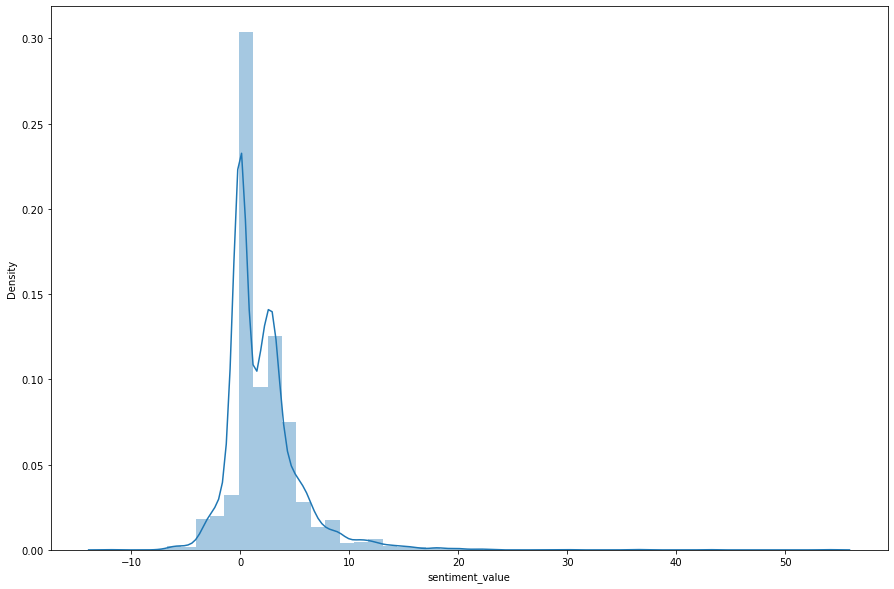

In [97]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])